# Data Mining
###  IPL Data Mining

In [48]:
#Importing LIBS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from collections import defaultdict
import plotly.express as px
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest


In [49]:
#Reading dataset
df_byb = pd.read_csv('deliveries.csv')
df_matches = pd.read_csv('matches.csv')

In [50]:
df_byb.head()


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [51]:
#check for nulll
df_byb.isnull().sum()


match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [52]:
df_matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [53]:
#checkfornull
df_matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [54]:
df_byb.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batter              object
bowler              object
non_striker         object
batsman_runs         int64
extra_runs           int64
total_runs           int64
extras_type         object
is_wicket            int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [55]:
df_matches.dtypes

id                   int64
season              object
city                object
date                object
match_type          object
player_of_match     object
venue               object
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
target_runs        float64
target_overs       float64
super_over          object
method              object
umpire1             object
umpire2             object
dtype: object

In [56]:
df_matches_season = df_matches[['id', 'season']]
df_byb_season = pd.merge(df_byb, df_matches_season, left_on='match_id', right_on='id', how='left')
df_byb_season.drop('id', axis=1, inplace=True)


In [57]:
df_byb_season.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,season
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,2007/08
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2007/08
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,2007/08
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2007/08
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2007/08


In [58]:
df_byb_season.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batter              object
bowler              object
non_striker         object
batsman_runs         int64
extra_runs           int64
total_runs           int64
extras_type         object
is_wicket            int64
player_dismissed    object
dismissal_kind      object
fielder             object
season              object
dtype: object

### Time Series analysis

In [59]:
#Run rate computation
season_stats = df_byb_season.groupby('season').agg({
    'total_runs': 'sum',
    'ball': 'count'  
}).rename(columns={'ball': 'total_balls'})

season_stats['run_rate'] = season_stats['total_runs'] / (season_stats['total_balls'] / 6)

season_stats = season_stats.reset_index()

print(season_stats[['season', 'run_rate']])


     season  run_rate
0   2007/08  7.978501
1      2009  7.211377
2   2009/10  7.814733
3      2011  7.460413
4      2012  7.582484
5      2013  7.460637
6      2014  7.943077
7      2015  8.066071
8      2016  8.028661
9      2017  8.131294
10     2018  8.358253
11     2019  8.147289
12  2020/21  8.001648
13     2021  7.751958
14     2022  8.171617
15     2023  8.628338
16     2024  9.111033


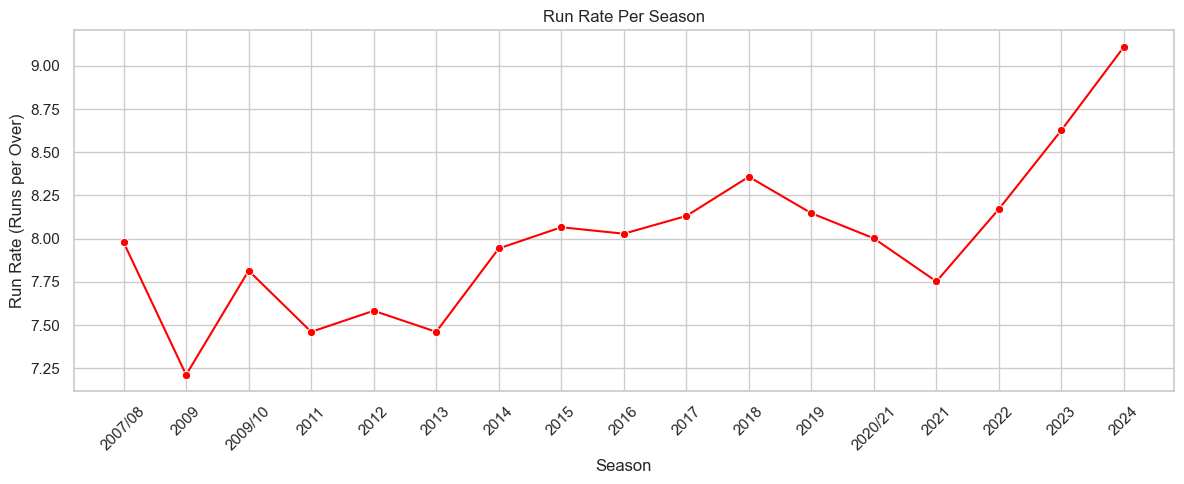

In [60]:
#runrate plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=season_stats, x='season', y='run_rate', marker='o', color='red')
plt.title('Run Rate Per Season')
plt.xlabel('Season')
plt.ylabel('Run Rate (Runs per Over)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [61]:
#batting average and strike rate computation
valid_balls = df_byb_season[~df_byb_season['extras_type'].isin(['wides'])]

season_batting = valid_balls.groupby('season').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count'),
    dismissals=('is_wicket', 'sum')
).reset_index()

season_batting['strike_rate'] = (season_batting['total_runs'] / season_batting['balls_faced']) * 100
season_batting['batting_average'] = season_batting['total_runs'] / season_batting['dismissals']


season_batting['strike_rate'] = season_batting['strike_rate'].round(2)
season_batting['batting_average'] = season_batting['batting_average'].round(2)

print(season_batting[['season', 'strike_rate', 'batting_average']])


     season  strike_rate  batting_average
0   2007/08       128.98            24.40
1      2009       116.77            22.12
2   2009/10       126.81            24.62
3      2011       120.72            24.60
4      2012       123.47            24.88
5      2013       121.40            23.59
6      2014       129.08            26.78
7      2015       132.00            25.40
8      2016       131.43            27.09
9      2017       133.33            25.35
10     2018       137.92            26.56
11     2019       133.72            27.28
12  2020/21       131.62            27.42
13     2021       126.95            24.76
14     2022       133.95            25.33
15     2023       141.72            26.81
16     2024       150.59            28.05


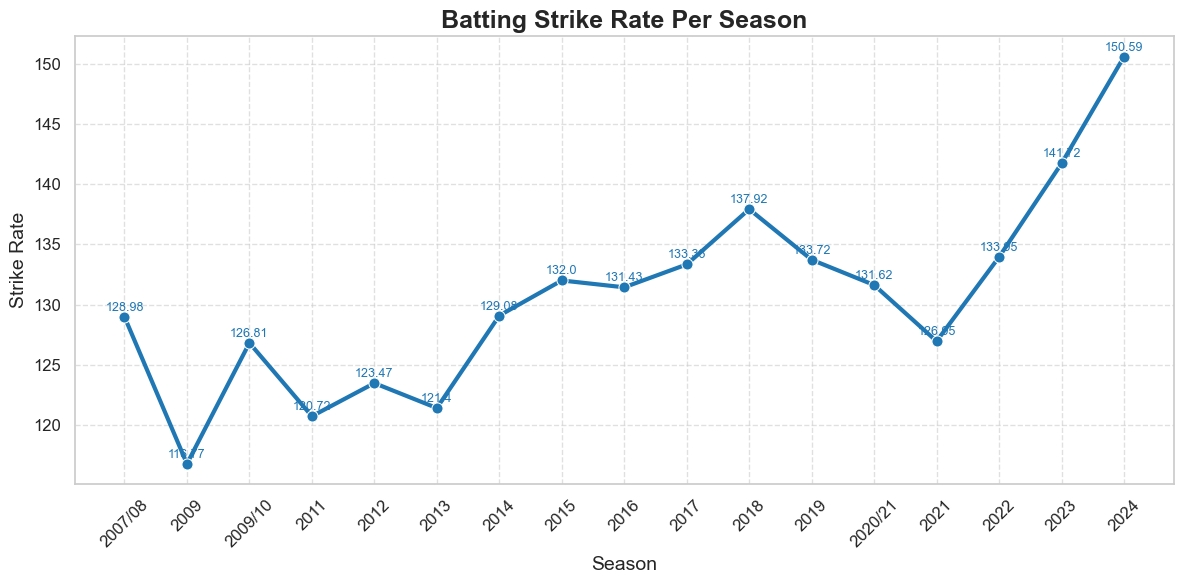

In [62]:

#plot batting stike 
sns.set_style("whitegrid") 

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=season_batting,
    x='season',
    y='strike_rate',
    marker='o',
    color='#1f77b4', 
    linewidth=3,
    markersize=8
)

for i in range(len(season_batting)):
    season = season_batting.loc[i, 'season']
    value = season_batting.loc[i, 'strike_rate']
    if pd.notna(value):
        plt.text(season, value + 0.5, f"{value}", ha='center', fontsize=9, color='#1f77b4')

plt.title('Batting Strike Rate Per Season', fontsize=18, fontweight='bold')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Strike Rate', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


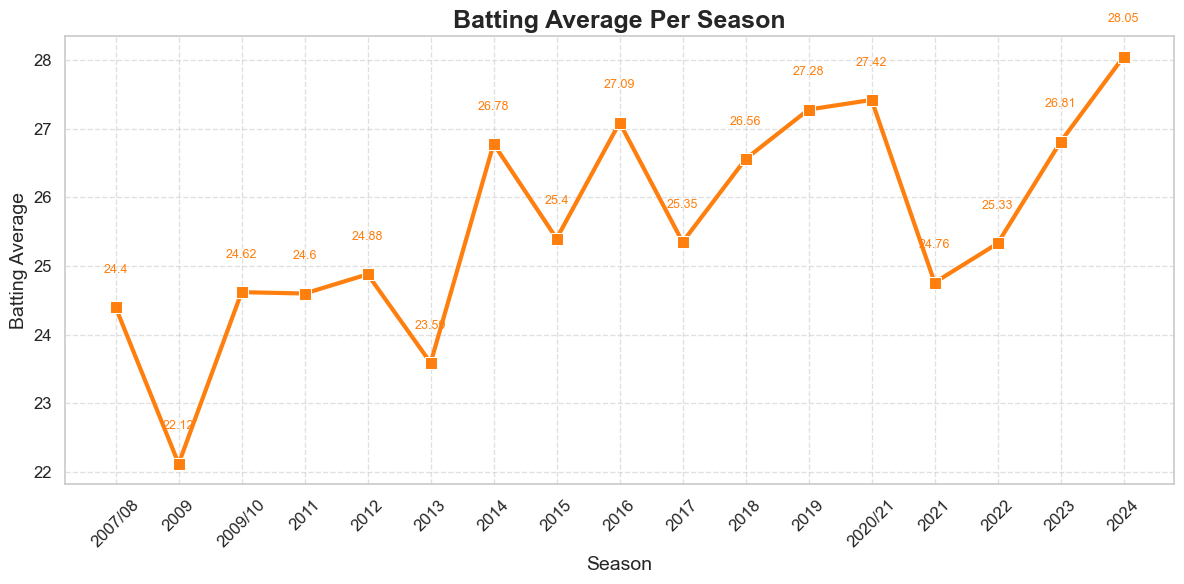

In [63]:
#plot batting average
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=season_batting,
    x='season',
    y='batting_average',
    marker='s',
    color='#ff7f0e', 
    linewidth=3,
    markersize=8
)

for i in range(len(season_batting)):
    season = season_batting.loc[i, 'season']
    value = season_batting.loc[i, 'batting_average']
    if pd.notna(value):
        plt.text(season, value + 0.5, f"{value}", ha='center', fontsize=9, color='#ff7f0e')

plt.title('Batting Average Per Season', fontsize=18, fontweight='bold')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Batting Average', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [64]:

# finding bowling average and strike rate
bowling_summary = valid_balls.groupby('season').agg(
    runs_conceded=('total_runs', 'sum'),
    balls_bowled=('ball', 'count')
).reset_index()

bowler_wickets = df_byb_season[
    (df_byb_season['is_wicket'] == 1) &
    (~df_byb_season['dismissal_kind'].isin(['run out', 'retired hurt', 'obstructing the field']))
]

wickets_per_season = bowler_wickets.groupby('season')['is_wicket'].sum().reset_index()
wickets_per_season.rename(columns={'is_wicket': 'wickets'}, inplace=True)

bowling_stats = pd.merge(bowling_summary, wickets_per_season, on='season', how='left')

bowling_stats['bowling_average'] = bowling_stats['runs_conceded'] / bowling_stats['wickets']
bowling_stats['bowling_strike_rate'] = bowling_stats['balls_bowled'] / bowling_stats['wickets']

bowling_stats = bowling_stats.replace([float('inf')], pd.NA)

bowling_stats['bowling_average'] = bowling_stats['bowling_average'].round(2)
bowling_stats['bowling_strike_rate'] = bowling_stats['bowling_strike_rate'].round(2)

print(bowling_stats[['season', 'bowling_average', 'bowling_strike_rate']])


     season  bowling_average  bowling_strike_rate
0   2007/08            28.71                21.58
1      2009            25.45                21.17
2   2009/10            28.96                22.22
3      2011            27.75                22.34
4      2012            28.30                22.37
5      2013            26.49                21.30
6      2014            30.44                22.94
7      2015            28.47                21.09
8      2016            31.01                23.13
9      2017            28.08                20.61
10     2018            29.33                20.92
11     2019            29.57                21.67
12  2020/21            29.91                22.32
13     2021            27.04                20.84
14     2022            27.69                20.25
15     2023            29.04                20.07
16     2024            30.27                19.73


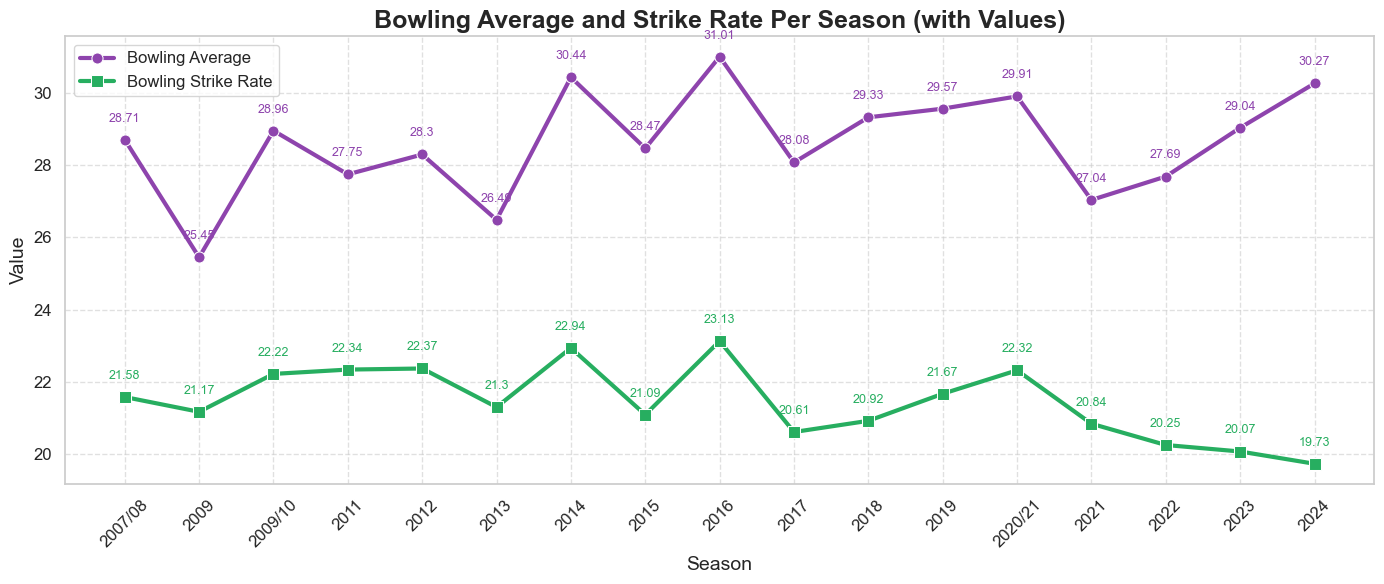

In [65]:
#plot for bowling average and strike rat
sns.set_style("whitegrid")

plt.figure(figsize=(14, 6))

sns.lineplot(
    data=bowling_stats,
    x='season',
    y='bowling_average',
    marker='o',
    color='#8e44ad',
    linewidth=3,
    markersize=8,
    label='Bowling Average'
)

for i in range(len(bowling_stats)):
    season = bowling_stats.loc[i, 'season']
    value = bowling_stats.loc[i, 'bowling_average']
    if pd.notna(value):
        plt.text(season, value + 0.5, f"{value}", ha='center', fontsize=9, color='#8e44ad')

sns.lineplot(
    data=bowling_stats,
    x='season',
    y='bowling_strike_rate',
    marker='s',
    color='#27ae60',
    linewidth=3,
    markersize=8,
    label='Bowling Strike Rate'
)

for i in range(len(bowling_stats)):
    season = bowling_stats.loc[i, 'season']
    value = bowling_stats.loc[i, 'bowling_strike_rate']
    if pd.notna(value):
        plt.text(season, value + 0.5, f"{value}", ha='center', fontsize=9, color='#27ae60')

plt.title('Bowling Average and Strike Rate Per Season (with Values)', fontsize=18, fontweight='bold')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


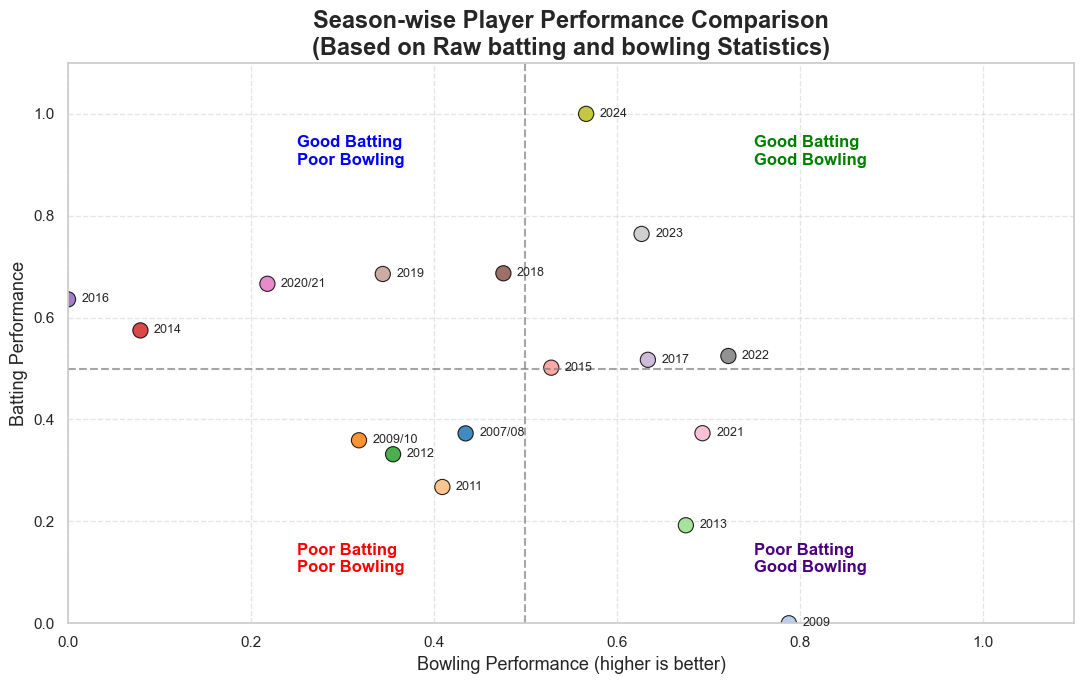

In [66]:
#normalization for padata
combined_stats = pd.merge(season_batting, bowling_stats, on='season', how='inner')

scaler = MinMaxScaler()

combined_stats[['norm_strike_rate', 'norm_batting_avg']] = scaler.fit_transform(
    combined_stats[['strike_rate', 'batting_average']]
)

combined_stats[['norm_bowling_avg', 'norm_bowling_sr']] = scaler.fit_transform(
    combined_stats[['bowling_average', 'bowling_strike_rate']]
)
combined_stats['norm_bowling_avg'] = 1 - combined_stats['norm_bowling_avg']
combined_stats['norm_bowling_sr'] = 1 - combined_stats['norm_bowling_sr']
#combining data

combined_stats['batting_performance'] = (combined_stats['norm_strike_rate'] + combined_stats['norm_batting_avg']) / 2
combined_stats['bowling_performance'] = (combined_stats['norm_bowling_avg'] + combined_stats['norm_bowling_sr']) / 2

#plot for batter and bowling stats season based comparison
palette = sns.color_palette('tab20', n_colors=len(combined_stats))


plt.figure(figsize=(11, 7))
plt.scatter(
    combined_stats['bowling_performance'],
    combined_stats['batting_performance'],
    s=120,
    c=palette,
    edgecolors='black',
    linewidth=0.8,
    alpha=0.85
)

for i in range(len(combined_stats)):
    plt.text(
        combined_stats['bowling_performance'][i] + 0.015,
        combined_stats['batting_performance'][i],
        str(combined_stats['season'][i]),
        fontsize=9,
        ha='left',
        va='center'
    )

plt.xlabel('Bowling Performance (higher is better)', fontsize=13, weight='medium')
plt.ylabel('Batting Performance', fontsize=13, weight='medium')
plt.title('Season-wise Player Performance Comparison\n(Based on Raw batting and bowling Statistics)',
          fontsize=17, weight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.axvline(x=0.5, color='gray', linestyle='--', alpha=0.7)
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7)
plt.text(0.75, 0.9, 'Good Batting\nGood Bowling', fontsize=12, color='green', weight='bold')
plt.text(0.25, 0.9, 'Good Batting\nPoor Bowling', fontsize=12, color='blue', weight='bold')
plt.text(0.75, 0.1, 'Poor Batting\nGood Bowling', fontsize=12, color='indigo', weight='bold')
plt.text(0.25, 0.1, 'Poor Batting\nPoor Bowling', fontsize=12, color='red', weight='bold')
plt.tight_layout()
plt.show()


Co-occurance Mining

In [67]:
import pandas as pd
from collections import defaultdict
from itertools import combinations
#fing player with high win percentage
players_per_match = df_byb.groupby('match_id')['batter'].unique().reset_index()
players_per_match['batters_list'] = players_per_match['batter'].apply(list)

df_matches.rename(columns={'id': 'match_id'}, inplace=True)
match_win_info = pd.merge(players_per_match, df_matches[['match_id', 'winner']], on='match_id')

pair_data = []

for _, row in match_win_info.iterrows():
    match_id = row['match_id']
    batters = row['batters_list']
    winner = row['winner']
    
    match_balls = df_byb[df_byb['match_id'] == match_id]
    batter_team_dict = dict(zip(match_balls['batter'], match_balls['batting_team']))
    
    for p1, p2 in combinations(batters, 2):
        p1, p2 = sorted([p1, p2])
        team_p1 = batter_team_dict.get(p1, "Unknown")
        team_p2 = batter_team_dict.get(p2, "Unknown")

        if team_p1 == team_p2:
            pair_data.append({
                'player1': p1,
                'player2': p2,
                'team': team_p1,
                'won': (winner == team_p1)
            })

pair_df = pd.DataFrame(pair_data)

pair_stats = pair_df.groupby(['player1', 'player2', 'team']).agg(
    matches_played=('won', 'count'),
    wins=('won', 'sum')
).reset_index()

pair_stats['win_rate'] = pair_stats['wins'] / pair_stats['matches_played']

MIN_APPEARANCES = 25
frequent_pairs = pair_stats[pair_stats['matches_played'] >= MIN_APPEARANCES]

frequent_pairs = frequent_pairs.sort_values(by=['win_rate', 'matches_played'], ascending=[False, False])

top_25_pairs = frequent_pairs.head(25)

print(top_25_pairs[['player1', 'player2', 'team', 'matches_played', 'wins', 'win_rate']])
print(top_25_pairs[['player1', 'player2', 'team', 'matches_played', 'wins', 'win_rate']].to_string(index=False))


            player1       player2                 team  matches_played  wins  \
6224      HH Pandya  Shubman Gill       Gujarat Titans              30    21   
4430      DA Miller     HH Pandya       Gujarat Titans              26    18   
6231      HH Pandya       WP Saha       Gujarat Titans              25    17   
9428     MEK Hussey      SK Raina  Chennai Super Kings              48    32   
2260      AT Rayudu      SK Raina  Chennai Super Kings              42    28   
10652      PA Patel     RG Sharma       Mumbai Indians              39    26   
7763     KA Pollard      PA Patel       Mumbai Indians              36    24   
9159        M Vijay    MEK Hussey  Chennai Super Kings              38    25   
8709    LMP Simmons     RG Sharma       Mumbai Indians              29    19   
9702      ML Hayden      MS Dhoni  Chennai Super Kings              26    17   
9416     MEK Hussey      MS Dhoni  Chennai Super Kings              43    28   
11906      SK Raina     SR Watson  Chenn

In [68]:
top_25_pairs['pair'] = top_25_pairs['player1'] + " & " + top_25_pairs['player2']

C:\Users\safal\AppData\Local\Temp\ipykernel_15476\1735961073.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
#bubble plot for top 25 batting pairs
fig = px.scatter(
    top_25_pairs,
    x='matches_played',
    y='win_rate',
    size='wins',
    color='team',
    hover_name='pair',
    title="Win Rate vs Matches Played (Size = Wins)",
    labels={
        'matches_played': 'Matches Played Together',
        'win_rate': 'Win Rate'
    },
    size_max=60
)

fig.add_shape(
    type="line",
    x0=top_25_pairs['matches_played'].min(),
    x1=top_25_pairs['matches_played'].max(),
    y0=top_25_pairs['win_rate'].mean(),
    y1=top_25_pairs['win_rate'].mean(),
    line=dict(color="black", width=1, dash="dot"),
    name="Average Win Rate"
)

fig.show()

In [70]:
sns.set(style="whitegrid")

In [71]:
# best pairs for each team mim 14 teams
MIN_APPEARANCES = 14
filtered_pairs = pair_stats[pair_stats['matches_played'] >= MIN_APPEARANCES]

top_pair_per_team = (
    filtered_pairs.loc[filtered_pairs.groupby('team')['win_rate'].idxmax()]
    .sort_values(by='win_rate', ascending=False)
)

print(top_pair_per_team[['team', 'player1', 'player2', 'matches_played', 'wins', 'win_rate']])
print(top_pair_per_team[['player1', 'player2', 'team', 'matches_played', 'wins', 'win_rate']].to_string(index=False))


                              team       player1           player2  \
8929              Rajasthan Royals        M Kaif         YK Pathan   
3863   Royal Challengers Bangalore      CH Gayle        TM Dilshan   
6986                Mumbai Indians    JC Buttler          PA Patel   
6224                Gujarat Titans     HH Pandya      Shubman Gill   
2260           Chennai Super Kings     AT Rayudu          SK Raina   
1817        Rising Pune Supergiant     AM Rahane         SPD Smith   
9375           Sunrisers Hyderabad  MC Henriques      Yuvraj Singh   
10874               Delhi Capitals       PP Shaw          S Dhawan   
5781              Delhi Daredevils     G Gambhir        TM Dilshan   
5766         Kolkata Knight Riders     G Gambhir  RN ten Doeschate   
4503               Kings XI Punjab     DA Miller          V Sehwag   
541                Deccan Chargers     A Symonds          TL Suman   
10248         Lucknow Super Giants      N Pooran         Q de Kock   
5660   Royal Challen

In [72]:
top_pair_per_team['pair'] = top_pair_per_team['player1'] + " & " + top_pair_per_team['player2']


In [73]:
#bubble plot for est pairs
fig = px.scatter(
    top_pair_per_team,
    x='matches_played',
    y='win_rate',
    size='wins',
    color='team',
    hover_name='pair',  
    title="Win Rate vs Matches Played (Size = Wins)",
    labels={
        'matches_played': 'Matches Played Together',
        'win_rate': 'Win Rate'
    },
    size_max=60
)

fig.add_shape(
    type="line",
    x0=top_pair_per_team['matches_played'].min(),
    x1=top_pair_per_team['matches_played'].max(),
    y0=top_pair_per_team['win_rate'].mean(),
    y1=top_pair_per_team['win_rate'].mean(),
    line=dict(color="black", width=1, dash="dot")
)

fig.show()

Kmeans

In [74]:
#stats gathering for k means 
player_batting = df_byb.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    dismissals=('is_wicket', 'sum'),
    balls_faced=('ball', 'count'),
    boundaries=('batsman_runs', lambda x: ((x == 4) | (x == 6)).sum())
).reset_index()

batter_innings = df_byb.groupby('batter')['match_id'].nunique().reset_index()
batter_innings.columns = ['batter', 'innings']

player_batting = pd.merge(player_batting, batter_innings, on='batter', how='left')
player_batting = player_batting[player_batting['innings'] >= 25]
player_batting['strike_rate'] = (player_batting['total_runs'] / player_batting['balls_faced']) * 100
player_batting['average'] = player_batting['total_runs'] / player_batting['dismissals'].replace(0, np.inf)
player_batting.replace([np.inf, -np.inf], np.nan, inplace=True)
player_batting.dropna(subset=['average'], inplace=True)


In [75]:
#k means implementation
X = player_batting[['strike_rate', 'average', 'boundaries']]
X_scaled = StandardScaler().fit_transform(X)


kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

player_batting['cluster'] = clusters

C:\Users\safal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [76]:
cluster_sizes = player_batting['cluster'].value_counts().reset_index()
cluster_sizes.columns = ['Cluster', 'PlayerCount']

cluster_sizes['size_label'] = cluster_sizes['Cluster'].astype(str) + " (n=" + cluster_sizes['PlayerCount'].astype(str) + ")"

In [77]:
#cluster Summary
cluster_summary = player_batting.groupby('cluster').agg(
    avg_strike_rate=('strike_rate', 'mean'),
    avg_average=('average', 'mean'),
    avg_boundaries=('boundaries', 'mean')
).round(2)

print("\nCluster Profiles:")
print(cluster_summary)


Cluster Profiles:
         avg_strike_rate  avg_average  avg_boundaries
cluster                                              
0                 103.34        12.68           34.94
1                 143.15        29.22          219.52
2                 122.09        25.03          171.78
3                 132.00        33.71          629.09


C:\Users\safal\AppData\Local\Temp\ipykernel_15476\3263654696.py:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




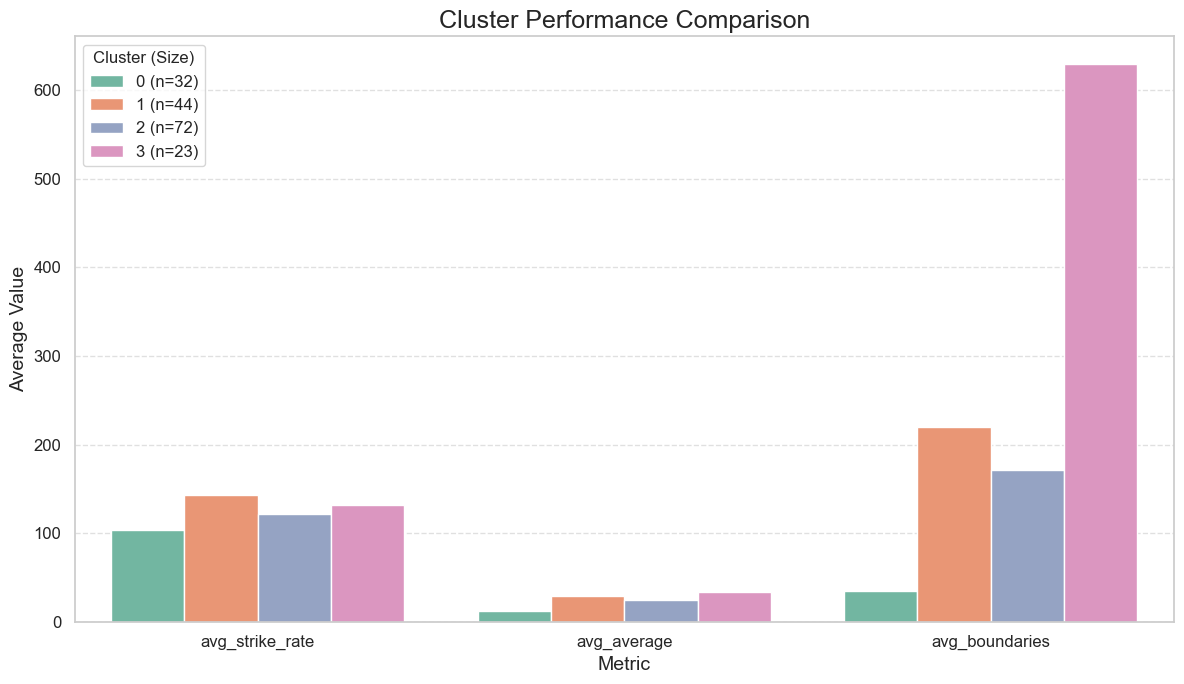

In [78]:
cluster_summary_t = cluster_summary.T.reset_index()
cluster_summary_t = cluster_summary_t.melt(id_vars='index', var_name='Cluster', value_name='Value')

cluster_summary_t['Cluster'] = cluster_summary_t['Cluster'].astype(int)

cluster_summary_t = pd.merge(cluster_summary_t, cluster_sizes, left_on='Cluster', right_on='Cluster')

plt.figure(figsize=(12, 7))
bar = sns.barplot(
    data=cluster_summary_t,
    x='index',
    y='Value',
    hue='size_label',
    palette='Set2',
    ci=None
)

#  cluster bar plot
plt.title("Cluster Performance Comparison", fontsize=18)
plt.xlabel("Metric", fontsize=14)
plt.ylabel("Average Value", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Cluster (Size)", fontsize=12)
plt.grid(True, linestyle='--', axis='y', alpha=0.6)
plt.tight_layout()
plt.show()

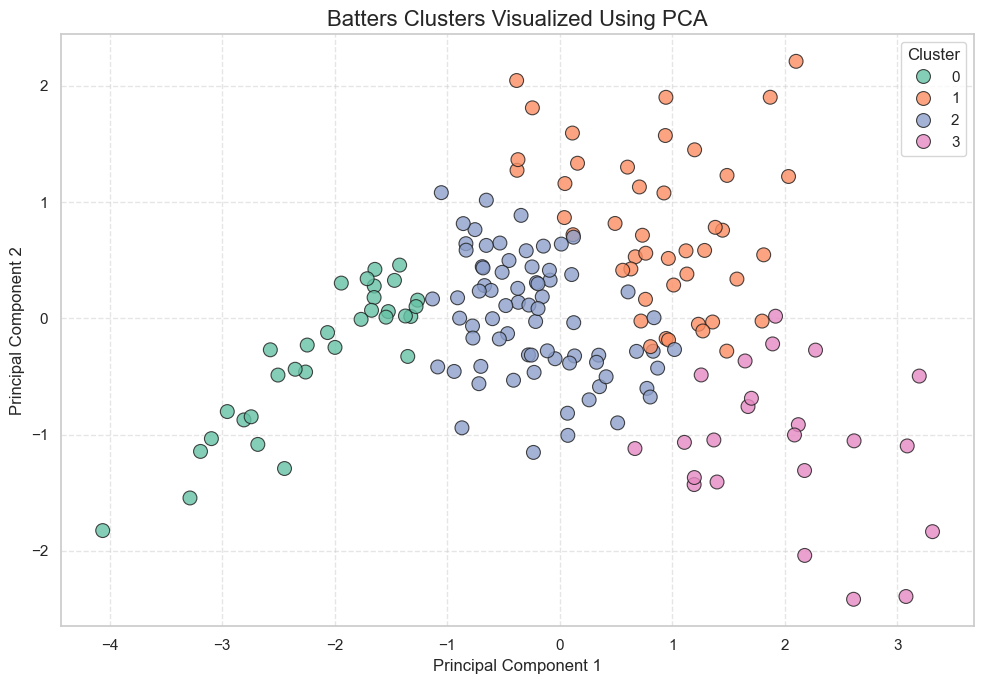

In [79]:
#k means pca plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=100, edgecolor='k', alpha=0.8)
plt.title("Batters Clusters Visualized Using PCA", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [80]:
#custer summary
player_batting_sorted = player_batting.sort_values(by='strike_rate', ascending=False)

top_players_by_cluster = player_batting_sorted.groupby('cluster').head(3)

print("\n--- Top Batters by Cluster ---\n")

for cluster in sorted(player_batting['cluster'].unique()):
    print(f"Batters Cluster {cluster}:")
    
    cluster_batters = top_players_by_cluster[top_players_by_cluster['cluster'] == cluster]
    
    for _, row in cluster_batters.iterrows():
        print(f" - {row['batter']:<15} | Strike Rate: {row['strike_rate']:.2f} | Average: {row['average']:.2f} | Innings: {row['innings']}")
    
    print()  


--- Top Batters by Cluster ---

Batters Cluster 0:
 - P Negi          | Strike Rate: 121.26 | Average: 14.04 | Innings: 35
 - JO Holder       | Strike Rate: 119.35 | Average: 12.33 | Innings: 27
 - AP Tare         | Strike Rate: 118.95 | Average: 14.12 | Innings: 27

Batters Cluster 1:
 - TM Head         | Strike Rate: 168.56 | Average: 38.60 | Innings: 25
 - AD Russell      | Strike Rate: 164.22 | Average: 29.62 | Innings: 104
 - H Klaasen       | Strike Rate: 161.99 | Average: 38.19 | Innings: 32

Batters Cluster 2:
 - MK Lomror       | Strike Rate: 135.48 | Average: 17.57 | Innings: 35
 - SN Thakur       | Strike Rate: 134.65 | Average: 13.35 | Innings: 35
 - ST Jayasuriya   | Strike Rate: 134.03 | Average: 26.48 | Innings: 30

Batters Cluster 3:
 - AB de Villiers  | Strike Rate: 148.58 | Average: 41.45 | Innings: 170
 - RR Pant         | Strike Rate: 143.60 | Average: 34.34 | Innings: 110
 - SA Yadav        | Strike Rate: 142.51 | Average: 32.09 | Innings: 135



bowler

In [81]:
#bowlers k means
bowler_stats = df_byb.groupby('bowler').agg(
    total_runs=('total_runs', 'sum'),
    total_wickets=('is_wicket', 'sum'),
    balls_bowled=('ball', 'count'),
    dot_balls=('batsman_runs', lambda x: (x == 0).sum())
).reset_index()

In [82]:
bowler_innings = df_byb.groupby('bowler')['match_id'].nunique().reset_index()
bowler_innings.columns = ['bowler', 'innings']

bowler_stats = pd.merge(bowler_stats, bowler_innings, on='bowler', how='left')
bowler_stats = bowler_stats[bowler_stats['innings'] >= 25]

bowler_stats['economy'] = bowler_stats['total_runs'] / (bowler_stats['balls_bowled'] / 6)
bowler_stats['wickets_per_innings'] = bowler_stats['total_wickets'] / bowler_stats['innings']
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['total_wickets'].replace(0, np.inf)
bowler_stats['dot_ball_percent'] = (bowler_stats['dot_balls'] / bowler_stats['balls_bowled']) * 100

bowler_stats.replace([np.inf, -np.inf], np.nan, inplace=True)
bowler_stats.dropna(inplace=True)

In [83]:
X = bowler_stats[['economy', 'wickets_per_innings', 'dot_ball_percent', 'strike_rate']]
X_scaled = StandardScaler().fit_transform(X)



kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

bowler_stats['cluster'] = clusters

C:\Users\safal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [84]:
#custer summary

cluster_summary = bowler_stats.groupby('cluster').agg(
    avg_economy=('economy', 'mean'),
    avg_wickets_per_innings=('wickets_per_innings', 'mean'),
    avg_dot_ball_percent=('dot_ball_percent', 'mean'),
    avg_strike_rate=('strike_rate', 'mean')
).round(2)

print("\nCluster Profiles:")
print(cluster_summary)


Cluster Profiles:
         avg_economy  avg_wickets_per_innings  avg_dot_ball_percent  \
cluster                                                               
0               7.80                     1.23                 44.89   
1               7.88                     0.54                 34.06   
2               8.65                     1.07                 38.41   
3               7.38                     0.95                 37.67   

         avg_strike_rate  
cluster                   
0                  18.82  
1                  29.52  
2                  19.33  
3                  22.03  


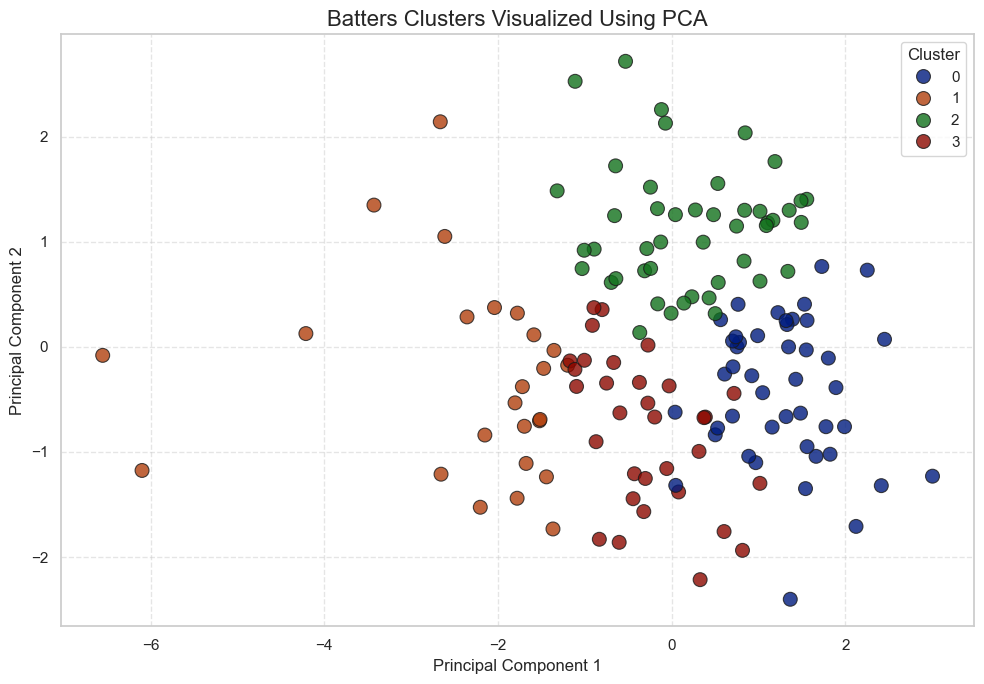

In [85]:
#k means pca plot

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='dark', s=100, edgecolor='k', alpha=0.8)
plt.title("Batters Clusters Visualized Using PCA", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\safal\AppData\Local\Temp\ipykernel_15476\559040350.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




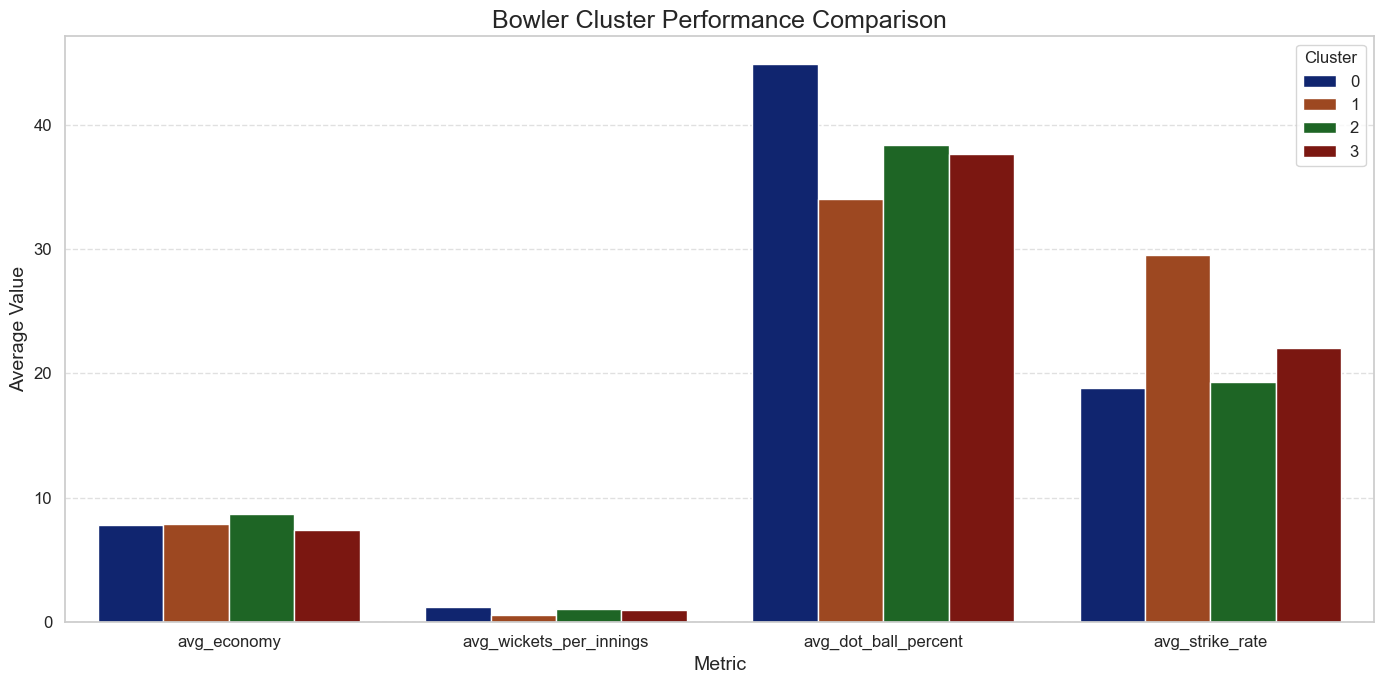

In [86]:

#k means bar plot
cluster_summary_t = cluster_summary.T.reset_index()
cluster_summary_t = cluster_summary_t.melt(id_vars='index', var_name='Cluster', value_name='Value')

plt.figure(figsize=(14, 7))
sns.barplot(data=cluster_summary_t, x='index', y='Value', hue='Cluster', palette='dark', ci=None)
plt.title("Bowler Cluster Performance Comparison", fontsize=18)
plt.xlabel("Metric", fontsize=14)
plt.ylabel("Average Value", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Cluster", fontsize=12)
plt.grid(True, linestyle='--', axis='y', alpha=0.6)
plt.tight_layout()
plt.show()

In [87]:
#custer summary

bowler_stats_sorted = bowler_stats.sort_values(by='wickets_per_innings', ascending=False)

top_players_by_cluster = bowler_stats_sorted.groupby('cluster').head(3)

print("\n--- Top Bowlers by Cluster ---\n")

for cluster in sorted(bowler_stats['cluster'].unique()):
    print(f"Bowlers Cluster {cluster}:")
    
    cluster_bowlers = top_players_by_cluster[top_players_by_cluster['cluster'] == cluster]
    
    for _, row in cluster_bowlers.iterrows():
        print(f" - {row['bowler']:<15} | Economy: {row['economy']:.2f} | Wkts/Inn: {row['wickets_per_innings']:.2f} | Innings: {row['innings']}")
    
    print()


--- Top Bowlers by Cluster ---

Bowlers Cluster 0:
 - DE Bollinger    | Economy: 7.16 | Wkts/Inn: 1.59 | Innings: 27
 - K Rabada        | Economy: 8.34 | Wkts/Inn: 1.57 | Innings: 80
 - SL Malinga      | Economy: 7.03 | Wkts/Inn: 1.54 | Innings: 122

Bowlers Cluster 1:
 - M Ashwin        | Economy: 7.90 | Wkts/Inn: 0.80 | Innings: 44
 - S Nadeem        | Economy: 7.48 | Wkts/Inn: 0.77 | Innings: 70
 - R Dhawan        | Economy: 7.98 | Wkts/Inn: 0.75 | Innings: 36

Bowlers Cluster 2:
 - AJ Tye          | Economy: 8.45 | Wkts/Inn: 1.60 | Innings: 30
 - HV Patel        | Economy: 8.45 | Wkts/Inn: 1.47 | Innings: 103
 - PWH de Silva    | Economy: 8.17 | Wkts/Inn: 1.38 | Innings: 26

Bowlers Cluster 3:
 - Rashid Khan     | Economy: 6.91 | Wkts/Inn: 1.30 | Innings: 121
 - CV Varun        | Economy: 7.54 | Wkts/Inn: 1.21 | Innings: 70
 - A Kumble        | Economy: 6.65 | Wkts/Inn: 1.17 | Innings: 42



In [88]:
#Random forest 
X = player_batting[['strike_rate', 'average', 'boundaries']]
X_scaled = StandardScaler().fit_transform(X)



iso_forest = IsolationForest(contamination=0.10, random_state=42)  
anomalies = iso_forest.fit_predict(X_scaled)

player_batting['anomaly'] = anomalies

anomalous_batters = player_batting[player_batting['anomaly'] == -1]

In [89]:
#outlier detection
print("\n Top Anomalous Batters (Outliers):")
anomalous_list = anomalous_batters[
    ['batter', 'strike_rate', 'average', 'boundaries', 'innings']
].sort_values(by='strike_rate', ascending=False)
print(anomalous_list.to_string(index=False))


 Top Anomalous Batters (Outliers):
         batter  strike_rate   average  boundaries  innings
        TM Head   168.558952 38.600000         116       25
     AD Russell   164.224422 29.619048         380      104
      H Klaasen   161.990212 38.192308         120       32
      SP Narine   155.894309 18.261905         261      106
      K Gowtham   155.345912 13.722222          32       27
 AB de Villiers   148.580442 41.448000         667      170
       CH Gayle   142.121729 39.039062         767      141
      DA Warner   135.429986 40.042683         899      184
B Sai Sudharsan   134.285714 49.238095         127       25
       KL Rahul   131.050866 44.235849         587      122
        V Kohli   128.511867 36.761468         981      244
      RG Sharma   127.918194 28.577586         880      251
       S Dhawan   123.454313 34.891753         921      221
      JJ Bumrah    85.000000  8.500000           6       26
  Kuldeep Yadav    81.696429 18.300000          19       32
 San

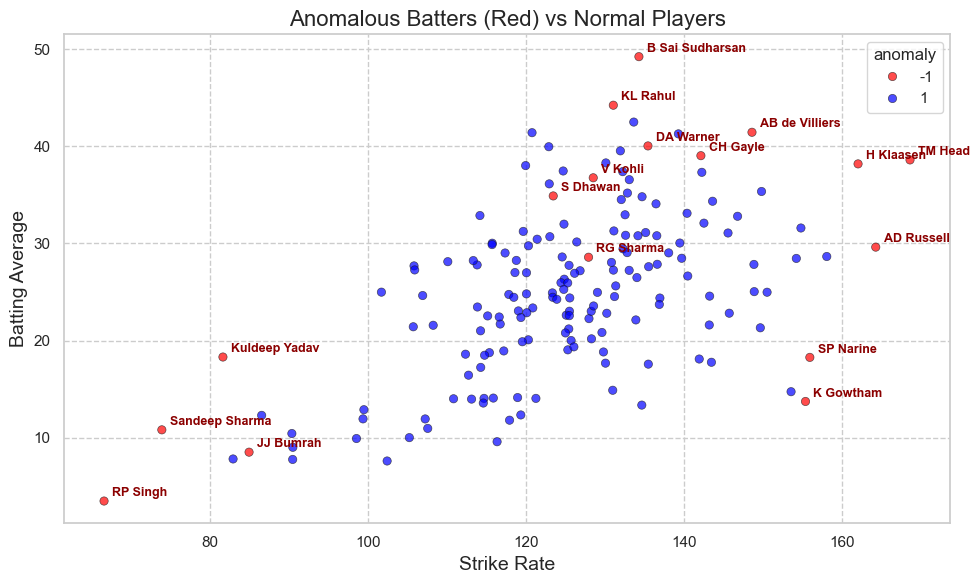

In [90]:
#figure ploting
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=player_batting,
    x='strike_rate',
    y='average',
    hue='anomaly',
    palette={1: 'blue', -1: 'red'},
    alpha=0.7,
    edgecolor='k'
)

outliers = player_batting[player_batting['anomaly'] == -1]

for i, row in outliers.iterrows():
    plt.text(
        row['strike_rate'] + 1,   
        row['average'] + 0.5,     
        row['batter'],            
        fontsize=9,
        color='darkred',
        weight='bold'
    )

plt.title("Anomalous Batters (Red) vs Normal Players", fontsize=16)
plt.xlabel("Strike Rate", fontsize=14)
plt.ylabel("Batting Average", fontsize=14)
plt.grid(True, linestyle='--')
plt.tight_layout()

plt.show()

In [91]:
#random forest 
X = bowler_stats[['economy', 'wickets_per_innings', 'dot_ball_percent']]
X_scaled = StandardScaler().fit_transform(X)

iso_forest = IsolationForest(contamination=0.10, random_state=42) 
anomalies = iso_forest.fit_predict(X_scaled)

In [92]:
bowler_stats['anomaly'] = anomalies

outliers = bowler_stats[bowler_stats['anomaly'] == -1]

In [93]:
#anamalous bowlers
print("\n Top Anomalous Bowlers (Outliers):")
print(outliers[['bowler', 'economy', 'wickets_per_innings', 'dot_ball_percent', 'innings']].sort_values(by='wickets_per_innings', ascending=False))


 Top Anomalous Bowlers (Outliers):
             bowler   economy  wickets_per_innings  dot_ball_percent  innings
34           AJ Tye  8.445378             1.600000         35.434174       30
117    DE Bollinger  7.160000             1.592593         48.666667       27
212        K Rabada  8.343996             1.575000         43.471421       80
438      SL Malinga  7.032952             1.540984         45.628783      122
132       DP Nannes  7.097242             1.310345         50.362845       29
7          A Kumble  6.646999             1.166667         41.709054       42
138        DW Steyn  6.791411             1.105263         50.788782       95
85     Basil Thampi  9.595547             1.040000         33.580705       25
263  M Muralitharan  6.698292             1.015152         43.959519       66
292      MP Stoinis  9.386282             0.725806         31.889290       62
462   Shahbaz Ahmed  9.289617             0.500000         29.143898       42
122       DJ Hussey  9.00928

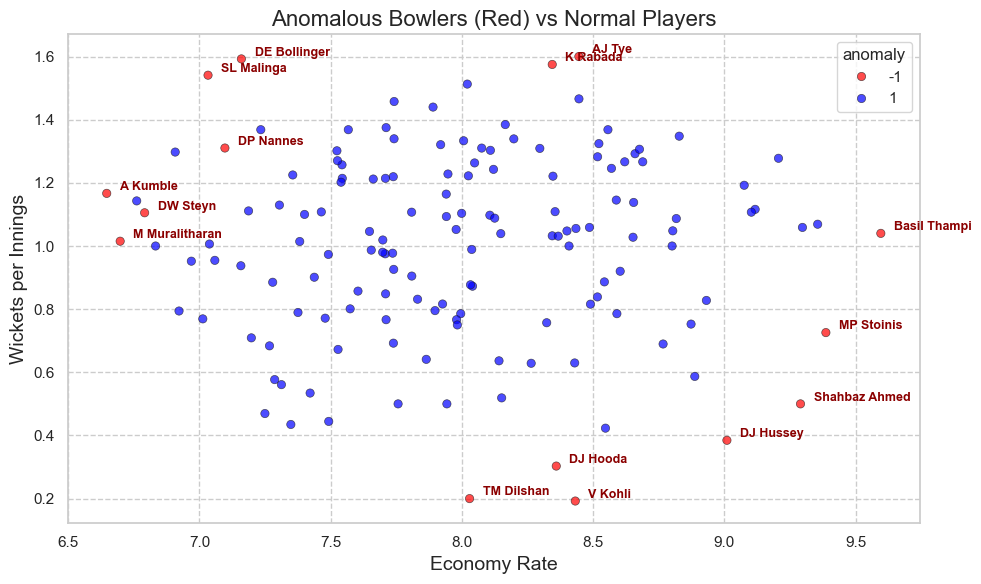

In [94]:
#anamoly plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=bowler_stats,
    x='economy',
    y='wickets_per_innings',
    hue='anomaly',
    palette={1: 'blue', -1: 'red'},
    alpha=0.7,
    edgecolor='k'
)

for i, row in outliers.iterrows():
    plt.text(
        row['economy'] + 0.05,
        row['wickets_per_innings'] + 0.01,
        row['bowler'],
        fontsize=9,
        color='darkred',
        weight='bold'
    )

plt.title("Anomalous Bowlers (Red) vs Normal Players", fontsize=16)
plt.xlabel("Economy Rate", fontsize=14)
plt.ylabel("Wickets per Innings", fontsize=14)
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()